### Assignment 2 - Exploratory Data Analysis (EDA) for Spotify Data: Popular Hip-hop Artists and Tracks Dataset

### Step 0: Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot') # Use stylesheet for plots
#plt.style.use('fivethirtyeight')
#pd.set_option('display.max_columns', 200)

%matplotlib inline

### Step 1: Reading Data and Data Understanding
- Read/Load Dataset

- Check Memory usage of the dataset. If large dataset, do the steps below as needed
    - Reduce the memory by removing unnecessary features/observations for the analysis
    - Reduce the memory by changing the datatype of the columns, float64->float16, int64->int16, object->category
    - Load dataset in chunks

- Check for basic information of the dataset
    - Check the number of observations and features of the Dataset
    - Top and bottom observations to understand the pattern
    - List the datatypes of the features

- Check for basic statistical information of the dataset

In [2]:
spotify_df = pd.read_csv("spotify.csv")

In [3]:
spotify_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 103.8 KB


In [4]:
print(f"Number of Observations: {spotify_df.shape[0]}\nNumber of Features: {spotify_df.shape[1]}")

Number of Observations: 440
Number of Features: 5


In [176]:
spotify_df.head()   

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe


In [6]:
spotify_df.tail()

,Artist,Track Name,Popularity,Duration (ms),Track ID
435,French Montana,Splash Brothers,44,221863,3fBsEOnzwtlkpS0LxXAZhN
436,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
437,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS
438,Diddy,Another One Of Me (feat. 21 Savage),65,220408,4hGmQboiou09EwhcTWa0H6
439,Rick Ross,Stay Schemin,68,267720,0nq6sfr8z1R5KJ4XUk396e


In [7]:
spotify_df.describe()

,Popularity,Duration (ms)
count,440.000000,440.000000
mean,75.736364,206810.040909
std,9.886534,53576.930289
min,29.000000,81666.000000
25%,70.000000,172778.500000
50%,77.000000,201866.000000
75%,83.000000,235119.750000
max,97.000000,501648.000000


In [8]:
spotify_df.describe(include='object')

,Artist,Track Name,Track ID
count,440,440,440
unique,115,412,413
top,Drake,Annihilate (Spider-Man: Across the Spider-Vers...,39MK3d3fonIP8Mz9oHCTBB
freq,20,3,3


##### ************* Insights on dataset
- Memory usage is 103.KB, dataset is a small dataset and hence no need to reduce memory further.
- There are no missing values and data is clean and can be used for further analysis.
- Datatypes of the features are all appropriate.
- There are 27 Track ID which are duplicates and must be removed.


### Step 2: Data Cleaning and Data Preparation
- Drop irrelevant features and observations
- Identify and drop duplicate features and observations
- Replace features(columns) values with appropriate values
- Handle Missing Data

In [9]:
# Check for any missing values
spotify_df.isnull().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [10]:
# Check for duplicate rows
duplicates = spotify_df[spotify_df.duplicated()]

#len(duplicates)

if (len(duplicates) > 0):
    print(f"Number of duplicate observations: {len(duplicates)} \n")
    display(duplicates)
else:
    print("There are no duplicate obsevations/rows.")

Number of duplicate observations: 27 



,Artist,Track Name,Popularity,Duration (ms),Track ID
39,Travis Scott,MELTDOWN (feat. Drake),86,246133,67nepsnrcZkowTxMWigSbb
52,Travis Scott,TELEKINESIS (feat. SZA & Future),86,353754,1i9lZvlaDdWDPyXEE95aiq
72,21 Savage,née-nah,88,220584,2yUzr8Sr6ldG8vmHhZwTnz
73,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
76,Drake,Rich Flex,85,239359,1bDbXMyjaUIooNwFE9wn0N
131,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
170,Metro Boomin,Trance (with Travis Scott & Young Thug),89,194786,5wG3HvLhF6Y5KTGlK0IW3J
182,D-Block Europe,Overseas,74,222154,337kcYVjYXdLBItCw9ry3b
210,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,87,157560,0RiRZpuVRbi7oqRdSMwhQY
212,Metro Boomin,Annihilate (Spider-Man: Across the Spider-Vers...,79,231746,39MK3d3fonIP8Mz9oHCTBB


In [11]:
# Remove duplicate rows
spotify_df.drop_duplicates(ignore_index=True, inplace=True)

In [12]:
# Duplicate Tracks are removed. All Tracks now are unique
spotify_df.describe(include='object')

,Artist,Track Name,Track ID
count,413,413,413
unique,115,412,413
top,Drake,Dial Drunk (with Post Malone),1yeB8MUNeLo9Ek1UEpsyz6
freq,17,2,1


In [13]:
spotify_df

,Artist,Track Name,Popularity,Duration (ms),Track ID
0,Drake,Rich Baby Daddy (feat. Sexyy Red & SZA),92,319191,1yeB8MUNeLo9Ek1UEpsyz6
1,Drake,One Dance,91,173986,1zi7xx7UVEFkmKfv06H8x0
2,Drake,IDGAF (feat. Yeat),90,260111,2YSzYUF3jWqb9YP9VXmpjE
3,Drake,First Person Shooter (feat. J. Cole),88,247444,7aqfrAY2p9BUSiupwk3svU
4,Drake,Jimmy Cooks (feat. 21 Savage),88,218364,3F5CgOj3wFlRv51JsHbxhe
...,...,...,...,...,...
408,French Montana,Stand United,54,163971,01CHrTerCzyRpMI1MzQ4fz
409,Jason Derulo,Tip Toe (feat. French Montana),65,187521,0TY3jVGwGDwDabLyQLVRQQ
410,Fat Joe,All The Way Up (feat. Infared),64,191900,7Ezwtgfw7khBrpvaNPtMoT
411,A$AP Ferg,"Work REMIX (feat. A$AP Rocky, French Montana, ...",69,283693,7xVLFuuYdAvcTfcP3IG3dS


### Step 3: Feature Understanding and Feature Relations
- Feature (Univariate) Analysis
    - Plotting Feature Distributions
    - Histogram
    - KDE
    - Boxplot
- Feature Relations
    - Bivariate Analysis
        - Scatterplot
        - Pairplot
        - Groupby Comparisons
    - Multivariate Analysis
        - Heatmap Correlation
        - Clustermap

## Step 4: Ask a question about the data
- Try to answer a question you have about the data using a plot or statistic

1. Load the dataframe and ensure data quality by checking for missing values and duplicate rows. Handle missing values and remove duplicate rows if   
   necessary.
2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.
3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.
4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.
5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.
6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.
7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.
8. Visualize relationships between multiple numerical variables simultaneously using a pair plot. 
9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.
10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

#### 1. Load the dataframe and ensure data quality by checking for missing values and duplicate rows. Handle missing values and remove duplicate rows if  necessary.

In [150]:
spotify_df.isnull().sum()

Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

In [154]:
spotify_df[spotify_df.duplicated()]

,Artist,Track Name,Popularity,Duration (ms),Track ID


##### ************* Insights on dataset
- There are no missing values.
- There are no duplicates in the dataset.
- Handling of missing value and removal of duplicate rows are handled as part of Data Cleaning and Data Preparation steps.

#### 2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

<Axes: xlabel='Popularity', ylabel='Count'>

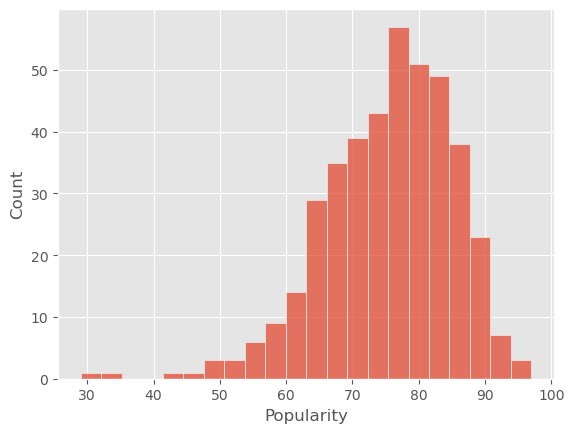

In [138]:
sns.histplot(spotify_df, x='Popularity')

#### 3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot.

In [155]:
spotify_df.columns

Index(['Artist', 'Track Name', 'Popularity', 'Duration (ms)', 'Track ID'], dtype='object')

In [15]:
spotify_df['Popularity'].corr(method='pearson', other=spotify_df['Duration (ms)'])

0.0389920092843909

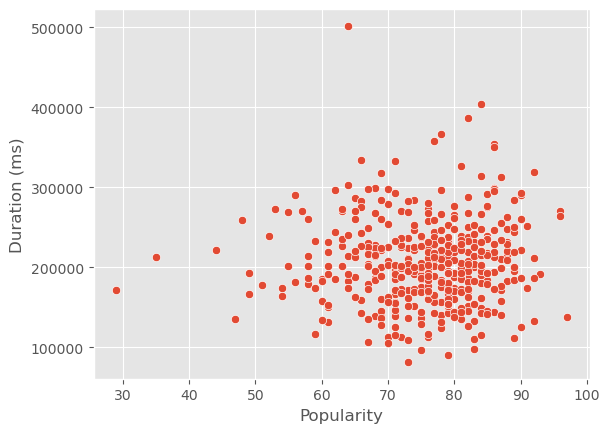

In [16]:
sns.scatterplot(spotify_df, x='Popularity', y='Duration (ms)')
plt.show()

#### 4. Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot.

In [17]:
# Group the observations by 'Artist', and get the number of Tracks for each Artist and sort
highest_tracks = spotify_df[['Artist','Track ID']].groupby('Artist').size().sort_values(ascending=False)

# After sorting, display the first index and and value 
print(f"Artist having highest number of Tracks -- Artist Name: {highest_tracks.index[0]} Tracks: {highest_tracks.values[0]}")

Artist having highest number of Tracks -- Artist Name: Drake Tracks: 17


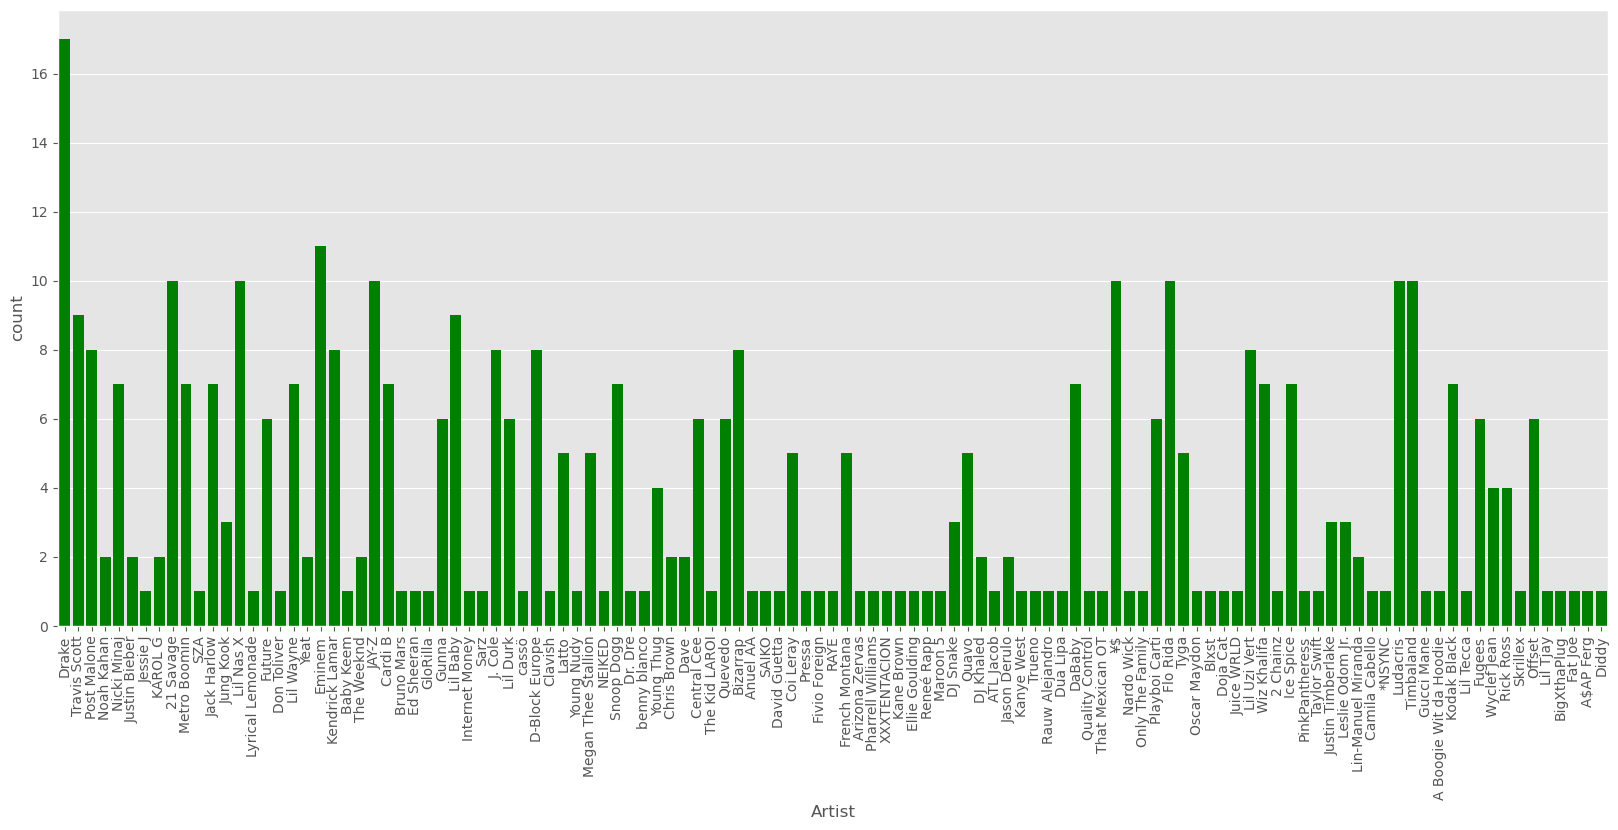

In [18]:
plt.figure(figsize=(20,8))
ax = sns.countplot(data=spotify_df, x='Artist', saturation=1.0, color='green')
plt.xticks(rotation=90)
plt.show()

#### 5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [19]:
spotify_df[['Artist','Track Name','Popularity']].sort_values('Popularity').head()

,Artist,Track Name,Popularity
199,Pressa,Attachments (feat. Coi Leray),29
219,Justin Bieber,Intentions,35
390,French Montana,Splash Brothers,44
213,Lil Baby,On Me - Remix,47
384,Wyclef Jean,911 (feat. Mary J. Blige),48


#### 6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

In [173]:
# Group the observations by 'Artist', and get the Poluarity mean to get the average popularity for top 5 Artist
spotify_df.groupby('Artist')['Popularity'].mean().sort_values(ascending=False).head()


Artist
cassö           92.000000
Trueno          89.000000
David Guetta    87.000000
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64

#### 7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [73]:
top5_artists = spotify_df[['Artist', 'Track Name', 'Popularity']].sort_values('Popularity', ascending=False).head()

#top5_artists[['Artist','Track Name', 'Popularity']]

print("Top 5 most popular Artists and theire most popular tracks:\n")
for item in top5_artists.values:
    print(f"\t(Artist Name: {item[0]}, \tTrack Name: {item[1]})")


Top 5 most popular Artists and theire most popular tracks:

	(Artist Name: Jack Harlow, 	Track Name: Lovin On Me)
	(Artist Name: 21 Savage, 	Track Name: redrum)
	(Artist Name: ¥$, 	Track Name: CARNIVAL)
	(Artist Name: Travis Scott, 	Track Name: FE!N (feat. Playboi Carti))
	(Artist Name: cassö, 	Track Name: Prada)


#### 8. Visualize relationships between multiple numerical variables simultaneously using a pair plot.

<Figure size 1000x1000 with 0 Axes>

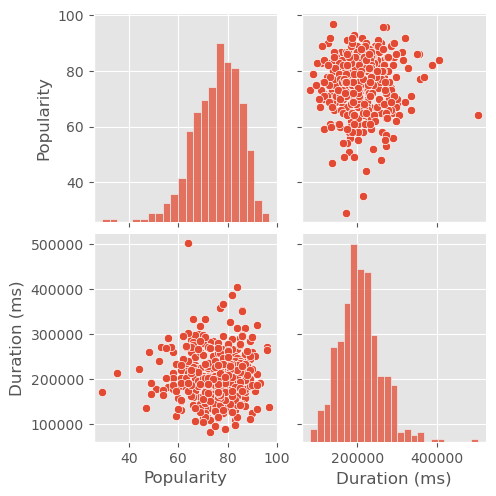

In [23]:
plt.figure(figsize=(10,10))
sns.pairplot(spotify_df)
plt.show()

#### 9. Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.

In [48]:
spotify_df['Duration (ms)'].describe()

count       413.000000
mean     206358.496368
std       53980.643666
min       81666.000000
25%      172185.000000
50%      201480.000000
75%      235093.000000
max      501648.000000
Name: Duration (ms), dtype: float64

<Axes: xlabel='Duration (ms)', ylabel='Count'>

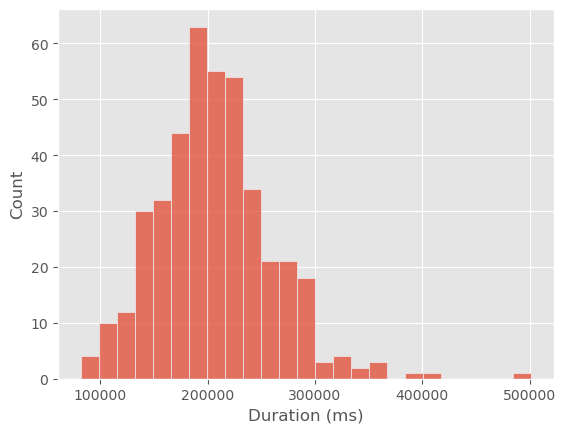

In [47]:
sns.histplot(spotify_df['Duration (ms)'])

<Axes: xlabel='Duration (ms)', ylabel='Artist'>

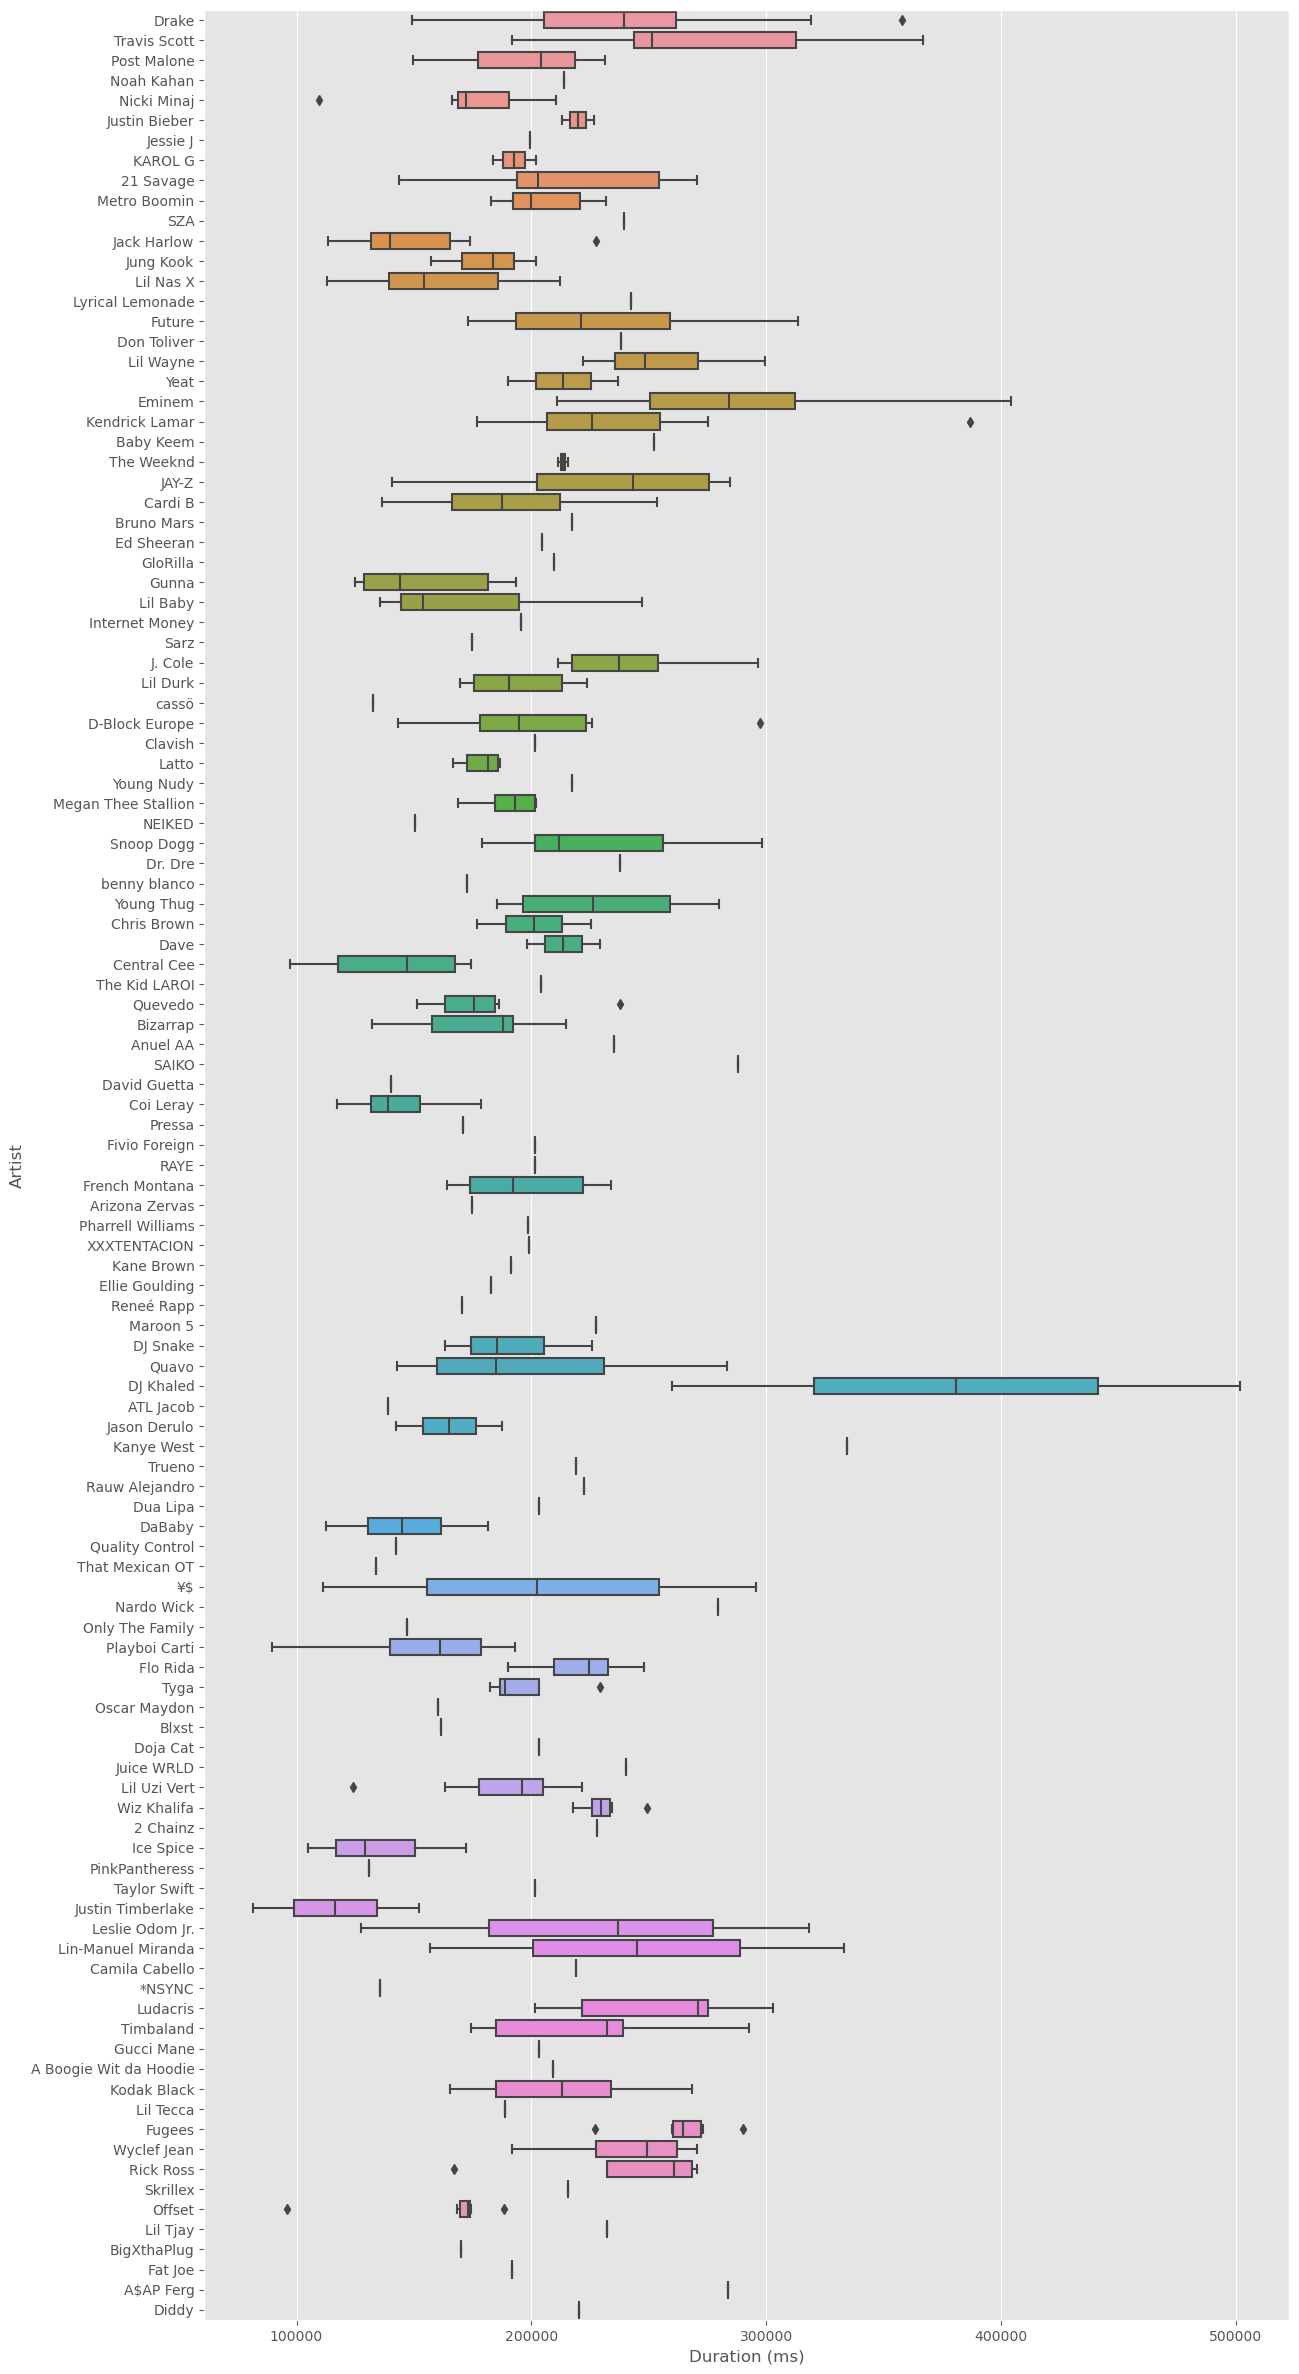

In [24]:
plt.figure(figsize=(14, 30))
sns.boxplot(spotify_df, x='Duration (ms)', y='Artist')

##### ************* Insights on dataset for Duration of the tracks among Artists.
- Most of the tracks have Duration between 172185 ms  235093 ms.
- Average Duration of tracks 206358

#### 10.How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

<Axes: xlabel='Popularity', ylabel='Artist'>

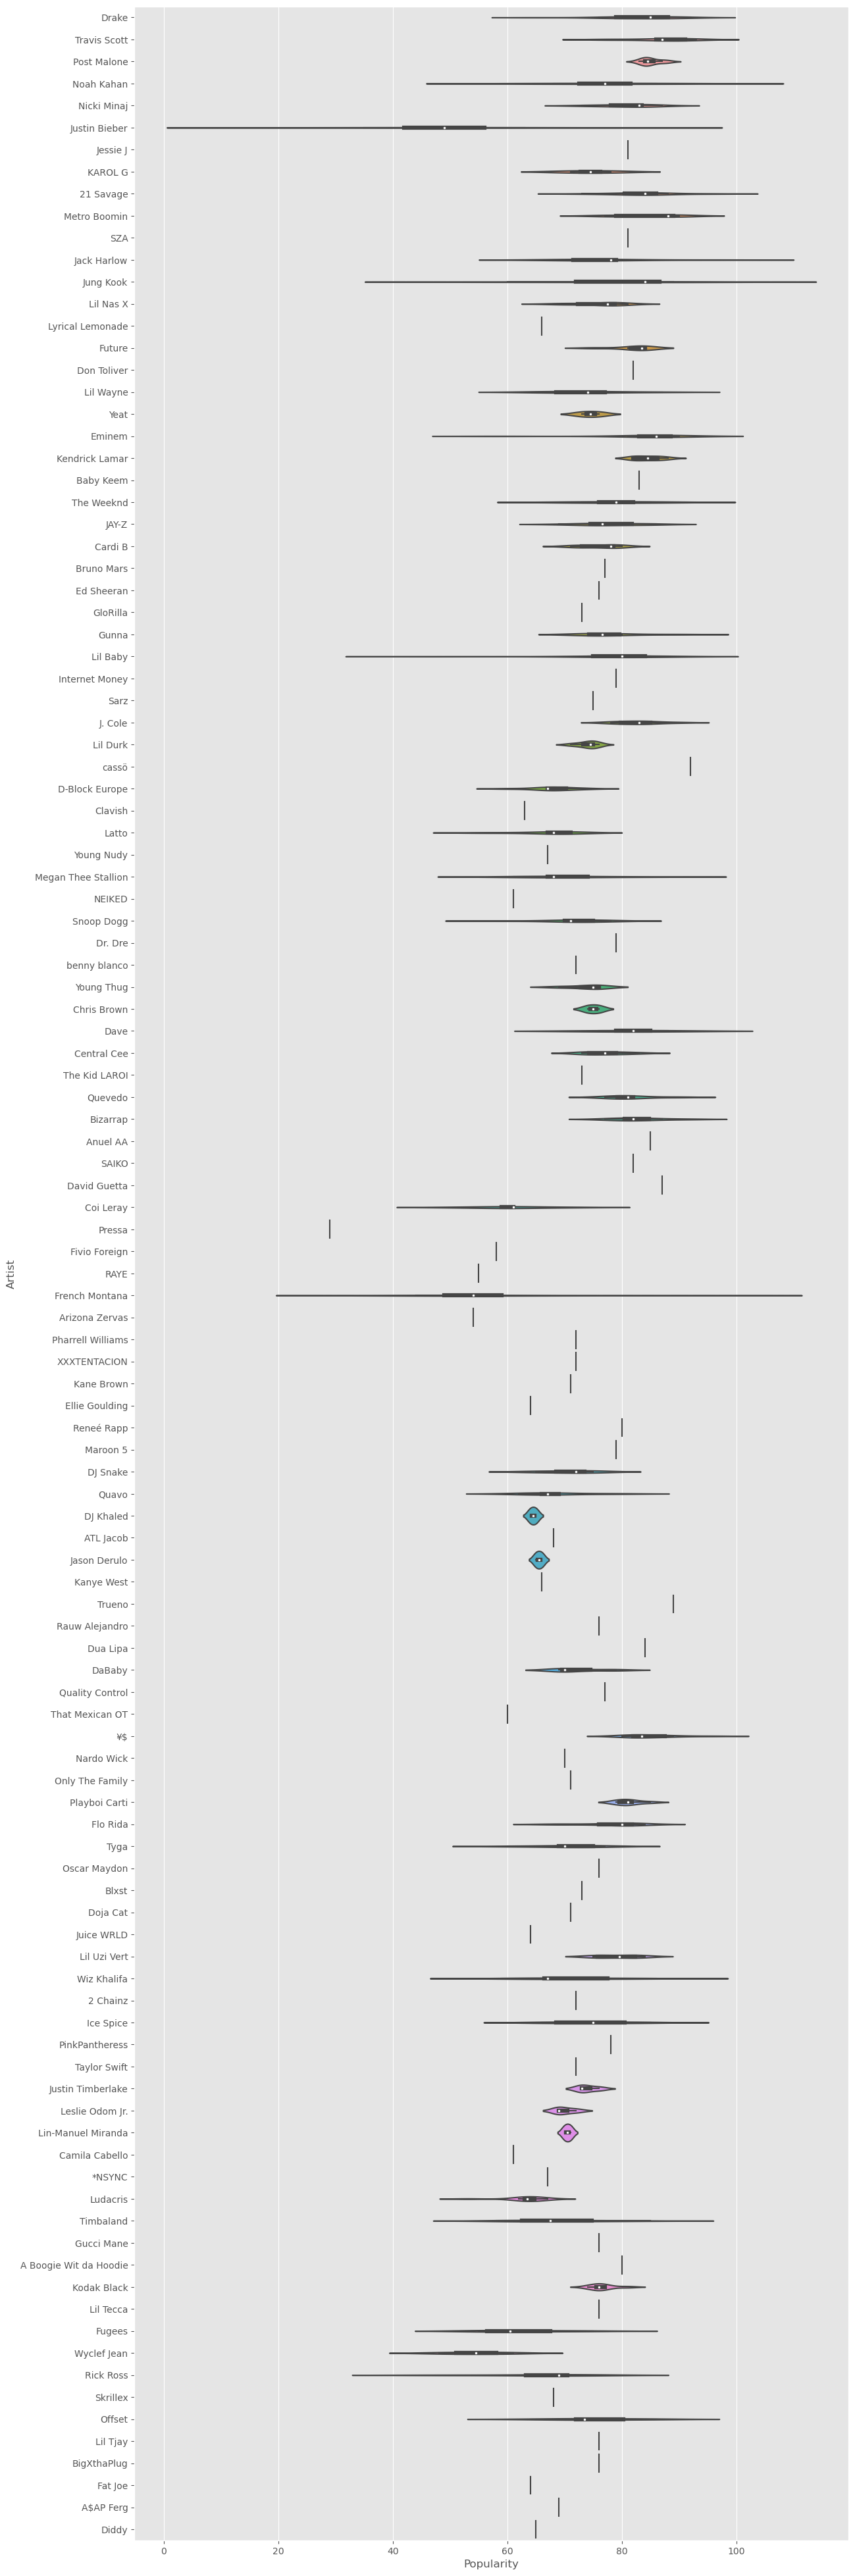

In [37]:
plt.figure(figsize=(14, 50))
#sns.swarmplot(spotify_df, x='Popularity', y='Artist')
sns.violinplot(spotify_df, x='Popularity', y='Artist')